# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [61]:
# some global variables

FILE_NAME = 'spam_or_not_spam.csv'
bow_emails = []
labels = []
vocabulary = []

In [2]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
  return email.split(" ")
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(words):
  stemmer = PorterStemmer()
  return [stemmer.stem(word) for word in words]

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(stemmed_words):
  stop_words = set(stopwords.words('english'))
  stem_no_stop_words = []

  for word in stemmed_words:
    if word not in stop_words:
      stem_no_stop_words.append(word)
    
  return stem_no_stop_words

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(all_words):
  vocab = []
  for word in all_words:
    if word not in vocab:
      vocab.append(word)
  
  return vocab

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stem_words, vocab):
  email_bow = [0 for i in range(len(vocab))]

  for i in range(len(vocab)):
    if vocab[i] in stem_words:
      email_bow[i] = 1
    
  return email_bow

# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()
def read_data():
  all_words = [] # contains all the words of all the emails
  stemmed_emails = [] # contains stemmed emails
  labels = [] # contains the labels
  vocabulary = [] # stores the vocobulary
  bow_emails = [] # stores the bowed emails
  with open(FILE_NAME, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.split(',') # read line and split by comma
        try:
            email = parts[0] # first part is email
            label = int(parts[1]) # second part is comma
            stemmed_email = remove_stop_words(stemming(read_email(email))) # stem the email
            all_words.extend(stemmed_email) # add all the words in the stemmed email to list
            stemmed_emails.append(stemmed_email) # store the stemmed email
            labels.append(label) # store the label
        except: # if some entries are erroneous, skip them
          continue
  
  vocabulary = build_vocabulary(all_words) # build the vocbulary
  for stemmed_email in stemmed_emails:
    bow_emails.append(get_bow(stemmed_email, vocabulary)) # bow the emails based on the stemmed_email and the vocabulary
  
  return bow_emails, labels, vocabulary

### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

In [3]:
bow_emails, labels, vocabulary = read_data() #read the entire dataset
X = np.array(bow_emails) #convert to numpy arrays
Y = np.array(labels)

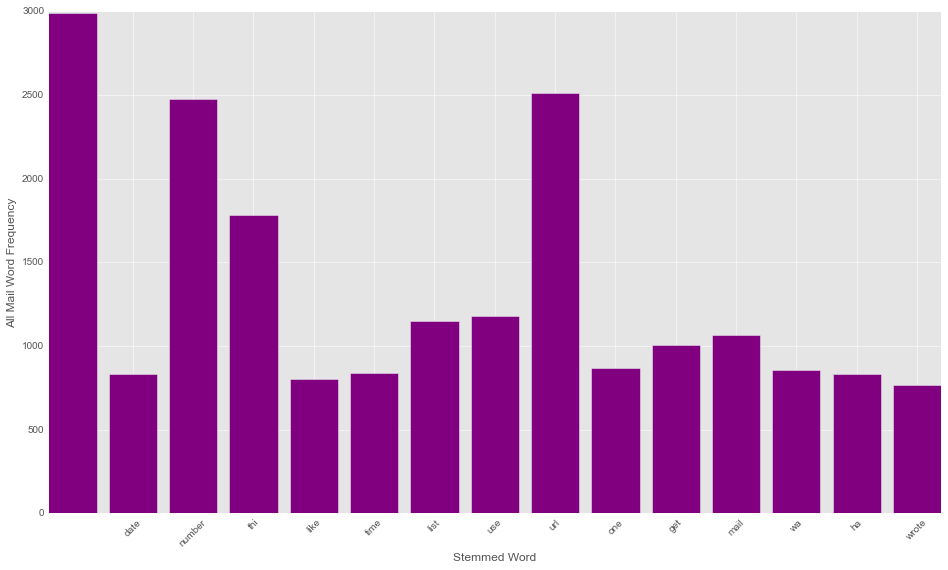

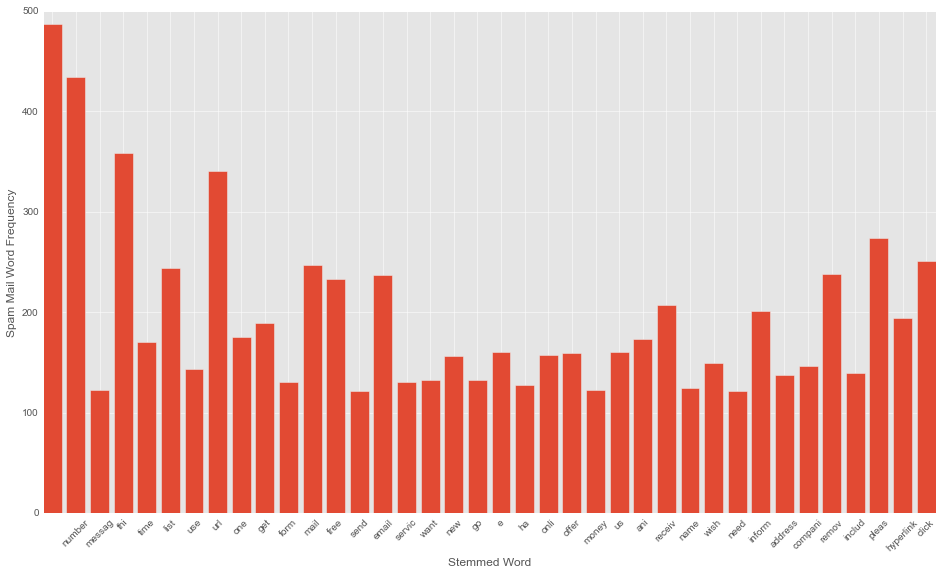

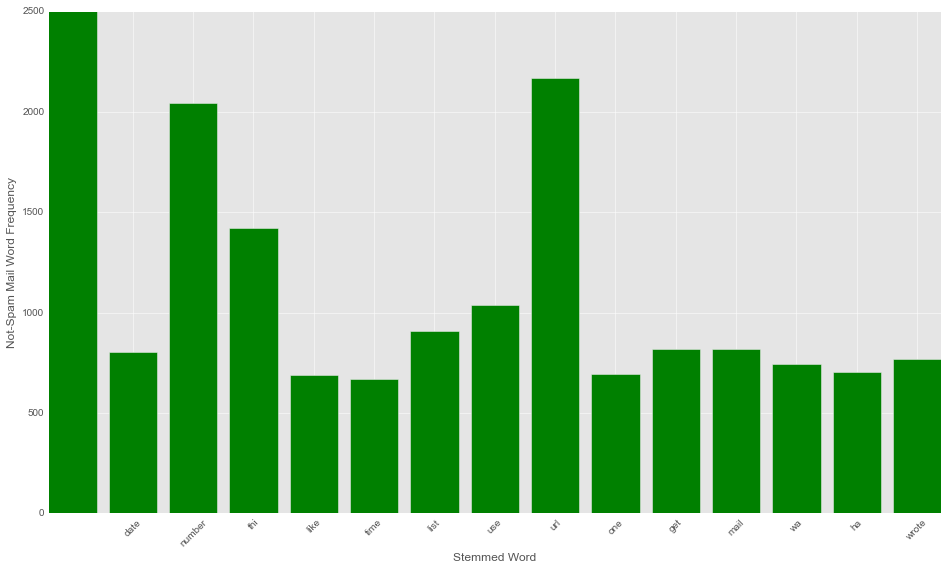

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualize data distribution
def data_vis():
  spam_freq = [0 for i in range(len(X[0]))] #contains spam frequency
  not_spam_freq = [0 for i in range(len(X[0]))] #contains non-spam frequency

  for i in range(len(Y)):
    if Y[i] == 0:
      not_spam_freq =  not_spam_freq + X[i]
    else:
      spam_freq =  spam_freq + X[i]
  tot_freq = spam_freq + not_spam_freq #contains total frequency

  LIMIT = 0.25 # Display words which are atleast 25% of the maximum frequency
  not_spam_dict = {} #dictionary for bar plotting
  spam_dict = {}
  tot_dict = {}
  for i in range(len(X[0])):
    if not_spam_freq[i] > LIMIT*np.max(not_spam_freq):
      not_spam_dict.update({vocabulary[i]: not_spam_freq[i]})
    if spam_freq[i] > LIMIT*np.max(spam_freq):
      spam_dict.update({vocabulary[i]: spam_freq[i]})
    if tot_freq[i] > LIMIT*np.max(tot_freq):
      tot_dict.update({vocabulary[i]: tot_freq[i]})

  plt.style.use('ggplot')
  plt.figure(figsize = (16, 9))
  plt.xlabel("Stemmed Word")
  plt.xticks(rotation=45)
  plt.ylabel("All Mail Word Frequency")
  plt.bar(list(tot_dict.keys()), list(tot_dict.values()), color ='purple')
  plt.show()

  plt.figure(figsize = (16, 9))
  plt.xlabel("Stemmed Word")
  plt.xticks(rotation=45)
  plt.ylabel("Spam Mail Word Frequency")
  plt.bar(list(spam_dict.keys()), list(spam_dict.values()))
  plt.show()

  plt.figure(figsize = (16, 9))
  plt.xlabel("Stemmed Word")
  plt.xticks(rotation=45)
  plt.ylabel("Not-Spam Mail Word Frequency")
  plt.bar(list(not_spam_dict.keys()), list(not_spam_dict.values()), color='green')
  plt.show()
  return

data_vis()


### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

train_ratio = 0.8 # ratio to split test and training sets
# split dataset
def split():
  arr = np.random.choice(len(X), int(len(X)*train_ratio), replace=False)
  mask = np.array([False for i in range(len(X))])
  for i in arr:
    mask[i] = True # create a mask array which has 80% true values and 20% false values
  
  return X[mask], X[~mask], Y[mask], Y[~mask] # return masked arrays - training set will be true values and test set will be false values

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(X_train, X_test, Y_train):
  clf = svm.SVC()
  clf.fit(X_train, Y_train)

  train_predictions = clf.predict(X_train)
  test_predictions = clf.predict(X_test)
  return train_predictions, test_predictions

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(X_train, X_test, Y_train):
  neigh = KNeighborsClassifier()
  neigh.fit(X_train, Y_train)

  train_predictions = neigh.predict(X_train)
  test_predictions = neigh.predict(X_test)
  return train_predictions, test_predictions

X_train, X_test, Y_train, Y_test = split() # split the dataset
svm_train_predictions, svm_test_predictions = svm_classifier(X_train, X_test, Y_train) # train svm model
knn_train_predictions, knn_test_predictions = knn_classifier(X_train, X_test, Y_train) # train knn model

### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [59]:
from sklearn import metrics

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
  acc = 0
  for i in range(len(true_labels)):
    if true_labels[i] == predicted_labels[i]: # if predicted label is equal to true label, then increment accuracy
      acc = acc + 1
  return (acc/len(true_labels) * 100)

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
  fpr, tpr, thresholds = metrics.roc_curve(true_labels, predicted_labels)
  return metrics.auc(fpr, tpr)

# write code to print train and test accuracy and AUC score of SVM and k-NN classifier
print("SVM classifier accuracy | ", end='')
print("Training Set Accuracy: {0} | Test Set Accuracy: {1}".format(compute_accuracy(Y_train, svm_train_predictions), compute_accuracy(Y_test, svm_test_predictions)))
print("SVM classifier AUC score | ", end='')
print("Training Set AUC: {0} | Test Set AUC: {1}".format(compute_auc(Y_train, svm_train_predictions), compute_auc(Y_test, svm_test_predictions)))
print("k-NN classifier accuracy | ", end='')
print("Training Set Accuracy: {0} | Test Set Accuracy: {1}".format(compute_accuracy(Y_train, knn_train_predictions), compute_accuracy(Y_test, knn_test_predictions)))
print("k-NN classifier AUC score | ", end='')
print("Training Set AUC: {0} | Test Set AUC: {1}".format(compute_auc(Y_train, knn_train_predictions), compute_auc(Y_test, knn_test_predictions)))

SVM classifier accuracy | Training Set Accuracy: 99.625 | Test Set Accuracy: 96.33333333333334
SVM classifier AUC score | Training Set AUC: 0.9881889763779528 | Test Set AUC: 0.907563025210084
k-NN classifier accuracy | Training Set Accuracy: 90.25 | Test Set Accuracy: 86.66666666666667
k-NN classifier AUC score | Training Set AUC: 0.893074844099168 | Test Set AUC: 0.8314610667551844
